In [1]:
import pandas as pd

df = pd.read_pickle('full_dataset_2.pkl')

df.head()

,acidic_rev,bitter_rev,sweet_rev,umami_rev,spicy_rev,rating,name,minutes,contributor_id,submitted,...,44229138,46779070,53425122,53472027,54670067,57357963,57370186,57501028,92043681,118855872
recipe_id,,,,,,,,,,,,,,,,,,,,,
38,0,0,0,0,0,4.250000,low fat berry blue frozen dessertlow fat berry...,5940.0,6132.0,1999-08-091999-08-091999-08-091999-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0,0,0,0,0,3.000000,biryanibiryanibiryanibiryanibiryanibiryanibiry...,6890.0,40742.0,1999-08-291999-08-291999-08-291999-08-291999-0...,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
40,0,0,0,0,2,4.333333,best lemonadebest lemonadebest lemonadebest le...,210.0,9396.0,1999-09-051999-09-051999-09-051999-09-051999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0,0,0,0,0,4.500000,carina s tofu vegetable kebabscarina s tofu ve...,21900.0,23790.0,1999-09-031999-09-031999-09-031999-09-031999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0,0,0,0,0,1.000000,best blackbottom piebest blackbottom piebest b...,2100.0,523185.0,1999-08-211999-08-211999-08-211999-08-211999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [2]:
df_train=df[df.columns[df.columns.isin(['rating','name','minutes','contributor_id','submitted','tags','nutrition','n_steps','steps','description','n_ingredients'])==False]].copy()

df_train[['acidic_rev','bitter_rev','sweet_rev','umami_rev','spicy_rev']]=df_train[['acidic_rev','bitter_rev','sweet_rev','umami_rev','spicy_rev']].astype(bool)

df_train_filt=df_train[df_train[['acidic_rev','bitter_rev','sweet_rev','umami_rev','spicy_rev']].sum(axis=1)>0].fillna(0)

In [3]:
from sklearn.model_selection import train_test_split

# Assuming df_train is your dataset and it's already loaded

# Separating features and targets
X = df_train_filt.drop(['acidic_rev', 'bitter_rev', 'sweet_rev', 'umami_rev', 'spicy_rev'], axis=1)
y = df_train_filt[['acidic_rev', 'bitter_rev', 'sweet_rev', 'umami_rev', 'spicy_rev']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Separating features and targets
X2 = df_train.drop(['acidic_rev', 'bitter_rev', 'sweet_rev', 'umami_rev', 'spicy_rev'], axis=1)
y2 = df_train[['acidic_rev', 'bitter_rev', 'sweet_rev', 'umami_rev', 'spicy_rev']]

# Splitting the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Determine the number of input features
n_features = X_train.shape[1]
# Determine the number of output labels
n_labels = y_train.shape[1]

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n_labels, activation='sigmoid')  # Use sigmoid for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary crossentropy for multi-label classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict on the test set (optional)
y_pred = model.predict(X_test)




Epoch 1/50


1218/1218 [==============================] - 3s 2ms/step - loss: 0.4813 - accuracy: 0.4681 - val_loss: 0.4586 - val_accuracy: 0.3951
Epoch 2/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4609 - accuracy: 0.5036 - val_loss: 0.4582 - val_accuracy: 0.5064
Epoch 3/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4598 - accuracy: 0.5112 - val_loss: 0.4589 - val_accuracy: 0.5617
Epoch 4/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4592 - accuracy: 0.5231 - val_loss: 0.4585 - val_accuracy: 0.5584
Epoch 5/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.5211 - val_loss: 0.4578 - val_accuracy: 0.5172
Epoch 6/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4588 - accuracy: 0.5261 - val_loss: 0.4579 - val_accuracy: 0.5458
Epoch 7/50
1218/1218 [==============================] - 2s 2ms/step - loss: 0.4584 - accuracy: 0.5351 - val_loss: 0.4580 - val_accu

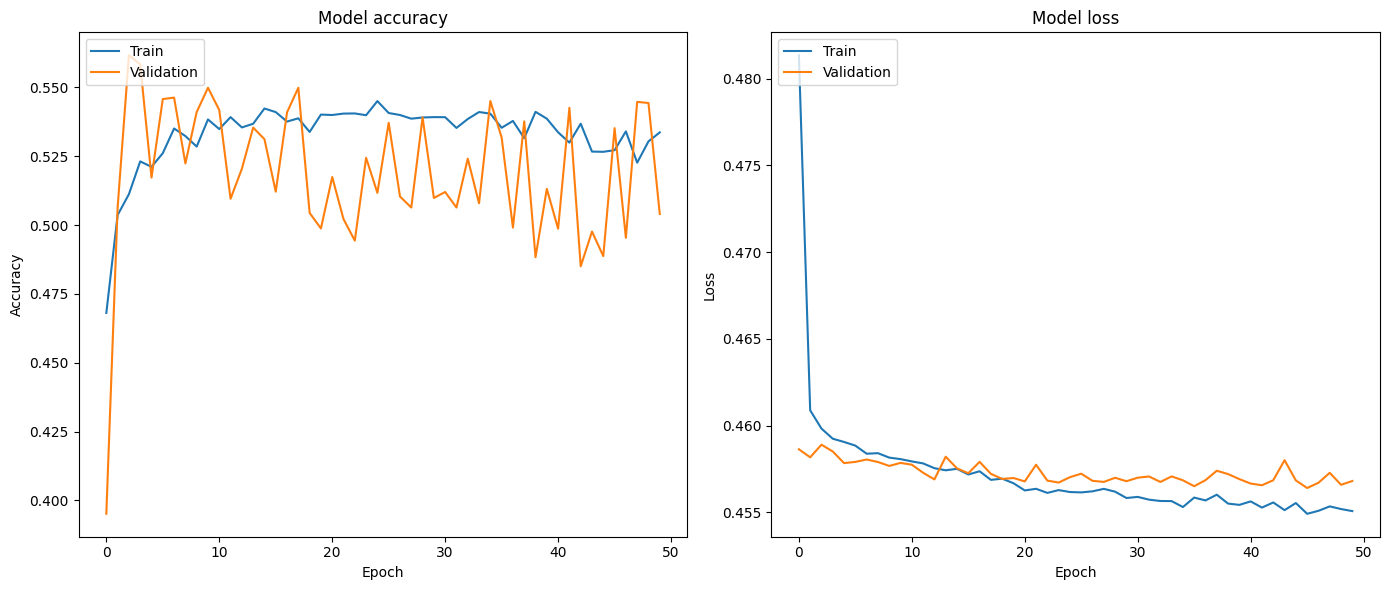

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

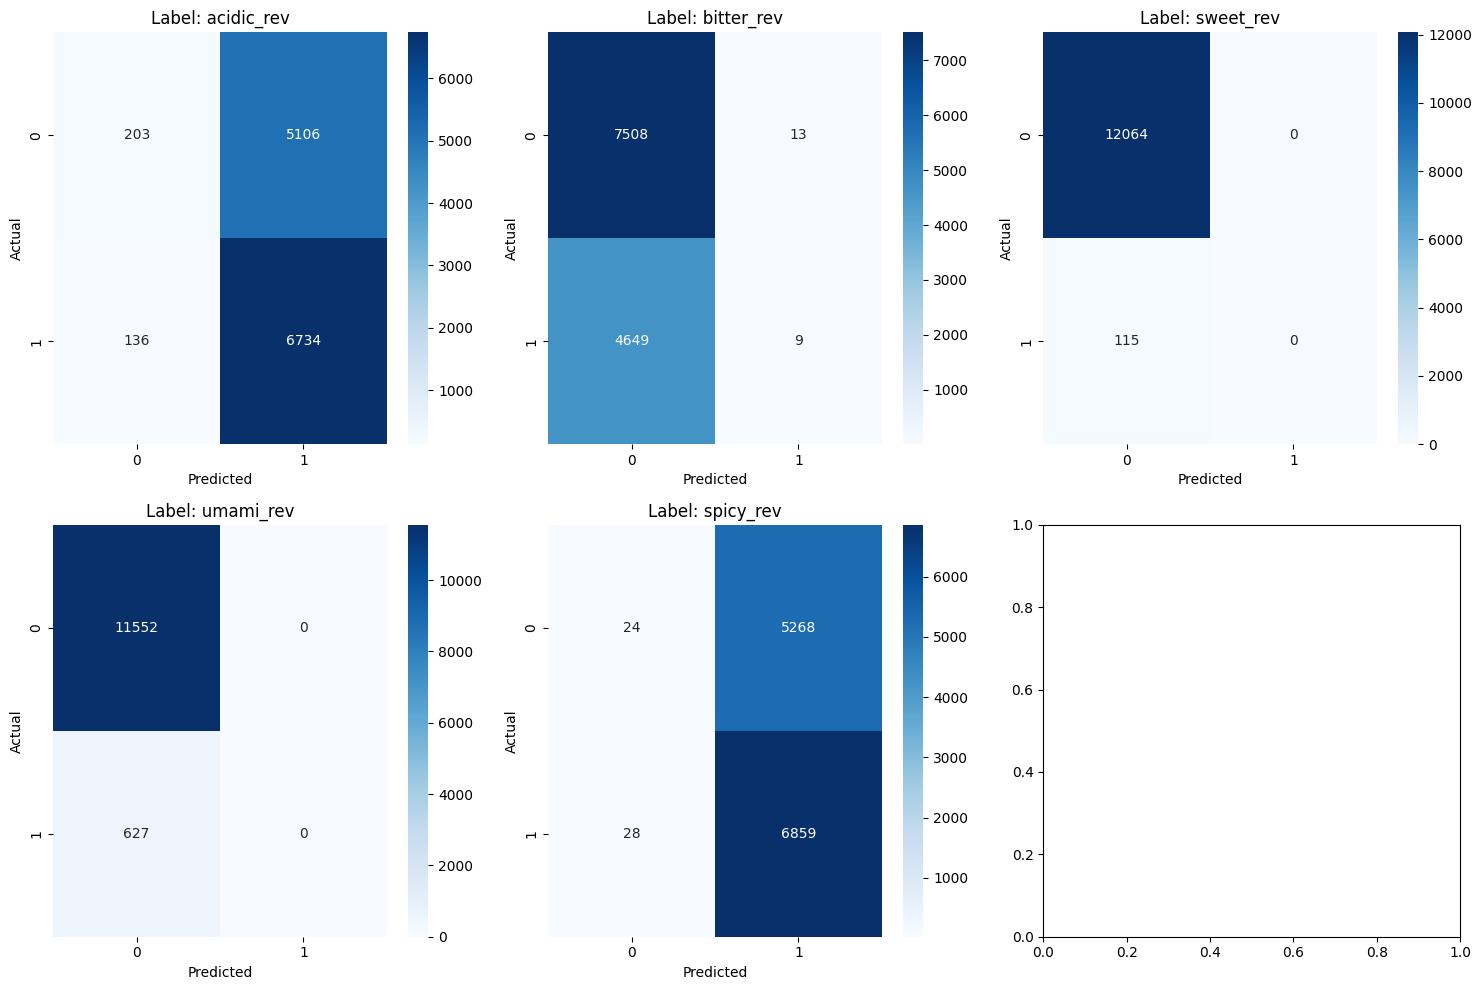

In [6]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

# Assuming y_pred is already thresholded to binary values if necessary
conf_matrices = multilabel_confusion_matrix(y_test, (y_pred > 0.5).astype(int))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, (label, cm) in enumerate(zip(y.columns, conf_matrices)):
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i//3, i%3], cmap="Blues")
    axes[i//3, i%3].set_title(f'Label: {label}')
    axes[i//3, i%3].set_ylabel('Actual')
    axes[i//3, i%3].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

---------